# Decision Tree From Scratch

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Decision Tree Regressor

In [3]:
# Load Data
data = pd.DataFrame({"X": np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
                     "y": np.array([1, 1.2, 1.4, 1.1, 1.0, 5.5, 6.1, 6.7, 6.4, 6, 5.9, 3, 3.2, 3.1])})
data.head()

,X,y
0,1,1.0
1,2,1.2
2,3,1.4
3,4,1.1
4,5,1.0


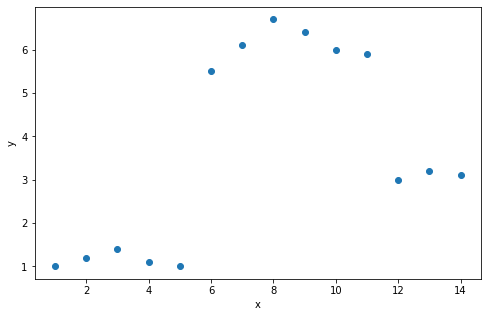

In [4]:
# plot data
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5))
ax.scatter(data['X'], data['y'])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Plot ulang data

In [5]:
# split data dengan fungsi
def split_data(data: pd.DataFrame, threshold: float or int):
    '''
    Split data into two regions
    Return: data_left <dataframe>, data_right <dataframe>
    '''
    data_left = data[data['X'] < threshold]
    data_right = data[data['X'] >= threshold]
    return data_left, data_right

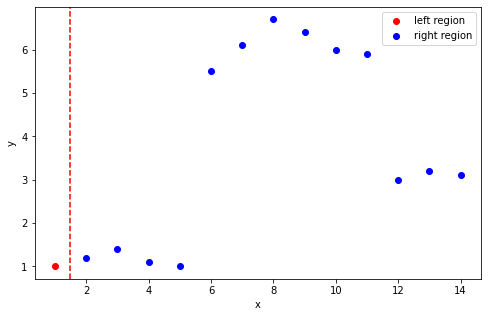

In [6]:
# threshold
thre = 1.5
# split data
data_left, data_right = split_data(data, thre)

# plot data
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5))
ax.scatter(data_left['X'], data_left['y'], c='r', label = 'left region')
ax.scatter(data_right['X'], data_right['y'], c='b', label = 'right region')
ax.axvline(x=thre, color='r', linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

Buat prediksi dan RMSE

In [7]:
# prediksi untuk regressor adalah rata-rata dari region
def calculate_prediction(data):
    # yang dihitung adalah data output
    pred = np.mean(data['y'])
    return pred

def calculate_rmse(y_test, y_pred):
    # root mean-squared error
    err = y_test-y_pred
    rmse = (np.mean(err**2))**0.5
    return rmse

In [8]:
# hitung prediksi region kiri
pred_left = calculate_prediction(data_left)

# hitung prediksi region kanan
pred_right = calculate_prediction(data_right)

# hitung rmse region kiri
rmse_left = calculate_rmse(data_left['y'], pred_left)

# hitung rmse region kanan
rmse_right = calculate_rmse(data_right['y'], pred_right)

In [9]:
print(f"Region kiri \n\t=> prediksi: {pred_left}\n\t=> RMSE: {rmse_left}")
print(f"Region kanan \n\t=> prediksi: {pred_right}\n\t=> RMSE: {rmse_right}")

Region kiri 
	=> prediksi: 1.0
	=> RMSE: 0.0
Region kanan 
	=> prediksi: 3.892307692307693
	=> RMSE: 2.1773171700906597


In [10]:
# menggabungkan fungsi-fungsi yang telah dibuat menjadi satu
def tree_regressor(data, threshold):
    data_left, data_right = split_data(data, threshold)
    # hitung prediksi region kiri
    pred_left = calculate_prediction(data_left)

    # hitung prediksi region kanan
    pred_right = calculate_prediction(data_right)

    # hitung rmse region kiri
    rmse_left = calculate_rmse(data_left['y'], pred_left)

    # hitung rmse region kanan
    rmse_right = calculate_rmse(data_right['y'], pred_right)

    print(f"Threshold: {threshold}")
    print(f"Region kiri \n\t=> prediksi: {pred_left}\n\t=> RMSE: {rmse_left}")
    print(f"Region kanan \n\t=> prediksi: {pred_right}\n\t=> RMSE: {rmse_right}")

    return pred_left, rmse_left, pred_right, rmse_right

In [11]:
# buat list untuk variasi threshold
thre_list = [*range(2, 15, 1)]

In [12]:
rmse_left = []
rmse_right = []

In [13]:
for thre in thre_list:
    data_left, data_right = split_data(data, thre)

    # hitung nilai prediksi
    pred_l = calculate_prediction(data_left)
    pred_r = calculate_prediction(data_right)

    if len(data_left)==0 or len(data_right)==0:
        pass
    # hitung nilai rmse
    rmse_l = calculate_rmse(data_left['y'], pred_l)
    rmse_r = calculate_rmse(data_right['y'], pred_r)

    rmse_left.append(rmse_l)
    rmse_right.append(rmse_r)
    print(f"="*25)
    print(f"Region kiri \n\t=> prediksi: {pred_l}\n\t=> RMSE: {rmse_l}")
    print(f"Region kanan \n\t=> prediksi: {pred_r}\n\t=> RMSE: {rmse_r}")
    print(f"="*25)

Region kiri 
	=> prediksi: 1.0
	=> RMSE: 0.0
Region kanan 
	=> prediksi: 3.892307692307693
	=> RMSE: 2.1773171700906597
Region kiri 
	=> prediksi: 1.1
	=> RMSE: 0.09999999999999998
Region kanan 
	=> prediksi: 4.116666666666667
	=> RMSE: 2.116929117587287
Region kiri 
	=> prediksi: 1.2
	=> RMSE: 0.16329931618554516
Region kanan 
	=> prediksi: 4.363636363636364
	=> RMSE: 2.0388377826919513
Region kiri 
	=> prediksi: 1.175
	=> RMSE: 0.14790199457749034
Region kanan 
	=> prediksi: 4.69
	=> RMSE: 1.844152922075607
Region kiri 
	=> prediksi: 1.1400000000000001
	=> RMSE: 0.1496662954709576
Region kanan 
	=> prediksi: 5.1000000000000005
	=> RMSE: 1.4483707321600288
Region kiri 
	=> prediksi: 1.8666666666666665
	=> RMSE: 1.6306099744846678
Region kanan 
	=> prediksi: 5.050000000000001
	=> RMSE: 1.5288884851420657
Region kiri 
	=> prediksi: 2.471428571428571
	=> RMSE: 2.115057774093914
Region kanan 
	=> prediksi: 4.8999999999999995
	=> RMSE: 1.5784259790780724
Region kiri 
	=> prediksi: 3.0
	=> 

In [14]:
rmse_left = np.array(rmse_left)
rmse_right = np.array(rmse_right)
rmse_total = rmse_left + rmse_right
best_threshold = thre_list[np.argmin(rmse_total)]

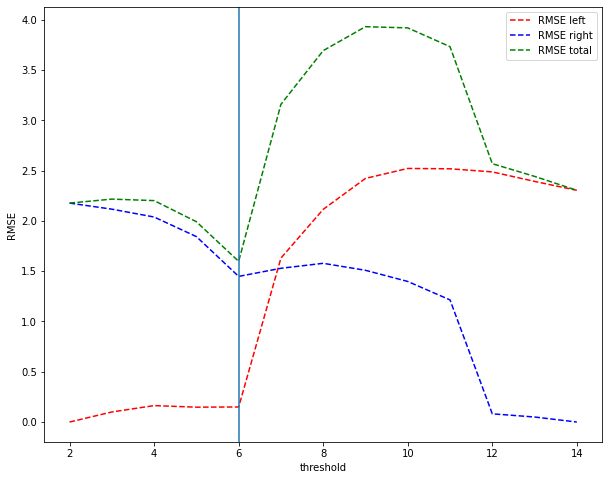

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 8))

ax.plot(thre_list, rmse_left, '--r', label='RMSE left')
ax.plot(thre_list, rmse_right, '--b', label='RMSE right')
ax.plot(thre_list, rmse_total, '--g', label='RMSE total')
ax.legend()
ax.axvline(best_threshold)
ax.set_xlabel('threshold')
ax.set_ylabel('RMSE')
plt.show()

berdasarkan eksperimen di atas, threshold terbaik adalah di titik 6

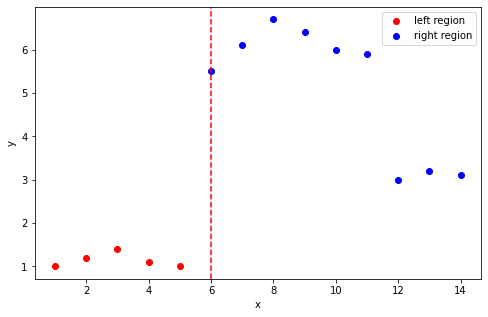

In [16]:
# plot kembali data beserta boundary yang telah kita dapat melalui perhitungan
# threshold
thre = best_threshold
# split data
data_left, data_right = split_data(data, thre)

# plot data
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5))
ax.scatter(data_left['X'], data_left['y'], c='r', label = 'left region')
ax.scatter(data_right['X'], data_right['y'], c='b', label = 'right region')
ax.axvline(x=thre, color='r', linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

bagi lagi data region kanan menjadi dua bagian

In [17]:
# fungsi untuk menentukan threshold terbaik
def create_tree(data):

    # buat range threshold yang ingin dicek
    thre_list = [*range(min(data['X']+1), max(data['X']+1), 1)]
    rmse_total = []
    
    for thre in thre_list:
        # split data
        data_left, data_right = split_data(data, thre)

        # hitung nilai prediksi
        pred_l = calculate_prediction(data_left)
        pred_r = calculate_prediction(data_right)

        if len(data_left)==0 or len(data_right)==0:
            pass

        rmse_l = calculate_rmse(data_left['y'], pred_l)
        rmse_r = calculate_rmse(data_right['y'], pred_r)

        rmse_total.append(rmse_l + rmse_r)

    # tentukan threshold terbaik berdasarkan rmse-nya
    best_thre = thre_list[np.argmin(rmse_total)]
    best_rmse = min(rmse_total)
    data_left, data_right = split_data(data, best_thre)

    return best_thre, best_rmse, data_left, data_right

In [18]:
bthre, brmse, data_left, data_right = create_tree(data_right)

In [19]:
bthre, brmse, data_left, data_right

(12,
 0.460243547812791,
      X    y
 5    6  5.5
 6    7  6.1
 7    8  6.7
 8    9  6.4
 9   10  6.0
 10  11  5.9,
      X    y
 11  12  3.0
 12  13  3.2
 13  14  3.1)

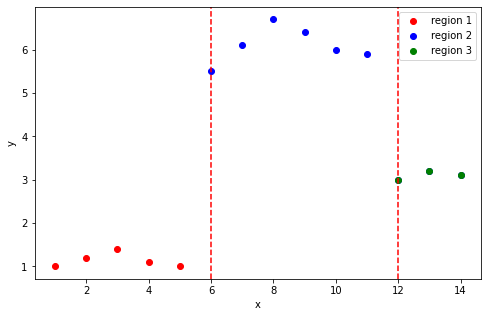

In [20]:
# plot kembali data beserta boundary yang telah kita dapat melalui perhitungan
# threshold
thre = best_threshold
# split data
data_left, data_right = split_data(data, thre)
_, data_most_right = split_data(data_right, bthre)

# plot data
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5))
ax.scatter(data_left['X'], data_left['y'], c='r', label = 'region 1')
ax.scatter(data_right['X'], data_right['y'], c='b', label = 'region 2')
ax.scatter(data_most_right['X'], data_most_right['y'], c='g', label = 'region 3')
ax.axvline(x=thre, color='r', linestyle='--')
ax.axvline(x=bthre, color='r', linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [21]:
# TODO: coba dengan sklearn

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi

In [24]:
# buat model
tree_regressor = DecisionTreeRegressor(criterion='squared_error')

In [25]:
tree_regressor.fit(np.array(data['X']).reshape(-1, 1), np.array(data['y']).reshape(-1, 1))

DecisionTreeRegressor()

In [26]:
X = np.linspace(min(data['X']), max(data['X']))
X

array([ 1.        ,  1.26530612,  1.53061224,  1.79591837,  2.06122449,
        2.32653061,  2.59183673,  2.85714286,  3.12244898,  3.3877551 ,
        3.65306122,  3.91836735,  4.18367347,  4.44897959,  4.71428571,
        4.97959184,  5.24489796,  5.51020408,  5.7755102 ,  6.04081633,
        6.30612245,  6.57142857,  6.83673469,  7.10204082,  7.36734694,
        7.63265306,  7.89795918,  8.16326531,  8.42857143,  8.69387755,
        8.95918367,  9.2244898 ,  9.48979592,  9.75510204, 10.02040816,
       10.28571429, 10.55102041, 10.81632653, 11.08163265, 11.34693878,
       11.6122449 , 11.87755102, 12.14285714, 12.40816327, 12.67346939,
       12.93877551, 13.20408163, 13.46938776, 13.73469388, 14.        ])

In [27]:
y = tree_regressor.predict(np.array(X).reshape(-1,1))

In [28]:
y

array([1. , 1. , 1.2, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4, 1.4, 1.1, 1.1, 1.1,
       1.1, 1. , 1. , 1. , 5.5, 5.5, 5.5, 5.5, 6.1, 6.1, 6.1, 6.1, 6.7,
       6.7, 6.7, 6.7, 6.4, 6.4, 6.4, 6.4, 6. , 6. , 6. , 5.9, 5.9, 5.9,
       5.9, 3. , 3. , 3. , 3. , 3.2, 3.2, 3.2, 3.2, 3.1, 3.1])

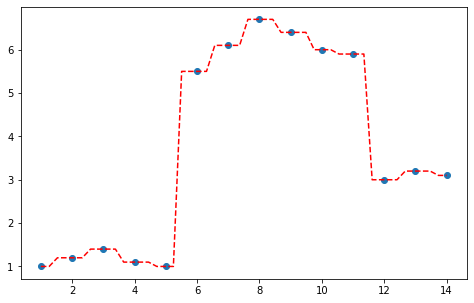

In [29]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 5))
ax.plot(X, y, '--r')
ax.scatter(data['X'], data['y'])
plt.show()

coba turunkan kompleksitas model agar tidak terjadi overfit

In [30]:
tree_regressor2 = DecisionTreeRegressor(max_depth=2)
tree_regressor2.fit(np.array(data['X']).reshape(-1, 1), np.array(data['y']).reshape(-1, 1))

DecisionTreeRegressor(max_depth=2)

In [31]:
y2 = tree_regressor2.predict(np.array(X).reshape(-1,1))

In [32]:
y2

array([1.2 , 1.2 , 1.2 , 1.2 , 1.2 , 1.2 , 1.2 , 1.2 , 1.2 , 1.2 , 1.05,
       1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 6.1 , 6.1 , 6.1 , 6.1 , 6.1 ,
       6.1 , 6.1 , 6.1 , 6.1 , 6.1 , 6.1 , 6.1 , 6.1 , 6.1 , 6.1 , 6.1 ,
       6.1 , 6.1 , 6.1 , 6.1 , 6.1 , 6.1 , 6.1 , 3.1 , 3.1 , 3.1 , 3.1 ,
       3.1 , 3.1 , 3.1 , 3.1 , 3.1 , 3.1 ])

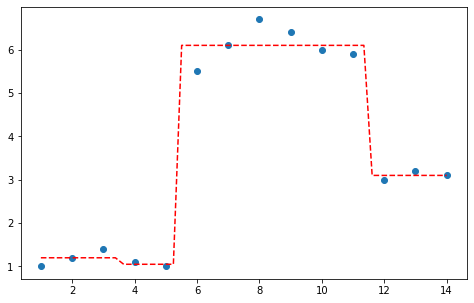

In [33]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 5))
ax.plot(X, y2, '--r')
ax.scatter(data['X'], data['y'])
plt.show()

# Decision Tree Classifier

In [34]:
set_1 = pd.DataFrame({"target": ["yes", "yes", "yes", "yes", "yes"]})

In [38]:
set_1

,target
0,yes
1,yes
2,yes
3,yes
4,yes


In [41]:
# hitung probability
set_1.value_counts(normalize=True)

1.0

probability untuk kelas "yes" adalah 1

In [ ]:
set_1.cou

In [45]:
import math

In [46]:
# hitung entropy
sum_H = 0
for label in set_1['target'].unique():
    p = set_1.value_counts(normalize=True)[label]
    sum_H += p*math.log2(p)
print(sum_H)

0.0


In [76]:
# buat fungsinya
def calculate_entropy(data, column):
    sum_H = 0
    for label in data[column].unique():
        p = data[column].value_counts(normalize=True)[label]
        sum_H += p*math.log2(p)
    sum_H = -sum_H
    print(sum_H)
    return sum_H

In [57]:
# Set yang sangat heterogen
set_2 = pd.DataFrame({"target": ["yes", "yes", "yes", "yes",
                                 "no", "no", "no", "no"]})

In [58]:
calculate_entropy(set_2)

1.0


In [60]:
play_tennis = pd.read_csv('play_tennis.csv')
play_tennis.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


- Untuk buat decision tree, pilih fitur yang information gain-nya paling besar.
- Information gain = entropy(parent) - average(entropy children)

In [62]:
play_tennis.drop('day', axis=1)

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [63]:
parent = 'outlook'

In [77]:
parent_entropy = calculate_entropy(play_tennis, parent)

1.5774062828523454


In [86]:
# hitung entropy
sum_H = 0
for label in play_tennis['outlook'].unique():
    p = play_tennis['outlook'].value_counts(normalize=True)[label]
    sum_H -= p*math.log2(p)
print(sum_H)

1.5774062828523454


In [91]:
data = play_tennis[parent].value_counts(normalize=True).reset_index()

In [96]:
data['entropy'] = data['outlook'].apply(lambda x: x*math.log(1/x)/math.log(3))

In [98]:
sum(data['entropy'])

0.9952325573220988

cek